# Demographic Data Analysis : 

## Importing Data and Important Libraries : 

In [13]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv(r"user-demographics.csv")

In [5]:
data.head()

,Town/City,Country,Users,New users,Engaged sessions,Engagement rate,Engaged sessions per user,Average engagement time,Event count
0,Hyderabad,India,75090,71123,81835,0.560468,1.089826,132.499694,758313
1,Bengaluru,India,74325,72162,84798,0.536459,1.140908,138.728988,776356
2,Chennai,India,54031,51207,55398,0.576372,1.025300,120.585664,511249
3,Mumbai,India,48323,45147,43751,0.483714,0.905387,103.302547,422074
4,Pune,India,44515,41678,45887,0.531401,1.030821,119.913759,420101


## Checking for the null and duplicated Values : 

In [8]:
data.isnull().sum()

Town/City                    0
Country                      0
Users                        0
New users                    0
Engaged sessions             0
Engagement rate              0
Engaged sessions per user    0
Average engagement time      0
Event count                  0
dtype: int64

In [11]:
data.duplicated().sum()

0

In [12]:
data.describe()

,Users,New users,Engaged sessions,Engagement rate,Engaged sessions per user,Average engagement time,Event count
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,258.603400,239.222400,244.537000,0.523479,0.853167,101.298684,2276.547400
std,2188.601568,2066.505792,2296.886373,0.121147,0.406458,173.481918,21224.330334
min,12.000000,5.000000,0.000000,0.000000,0.000000,0.000000,36.000000
25%,19.000000,17.000000,15.000000,0.450525,0.670073,47.175600,128.000000
50%,33.000000,29.000000,28.000000,0.525000,0.823529,77.371173,250.000000
75%,84.000000,77.000000,73.000000,0.600000,0.983146,119.423881,689.250000
max,75090.000000,72162.000000,84798.000000,1.000000,13.294118,6895.550000,776356.000000


## Sorting Top 20 Cities for the Analysis : 

In [14]:
top_cities = data.sort_values(by = 'Users',ascending=False).head(20)

## Top 20 Cities by Number of Users : 

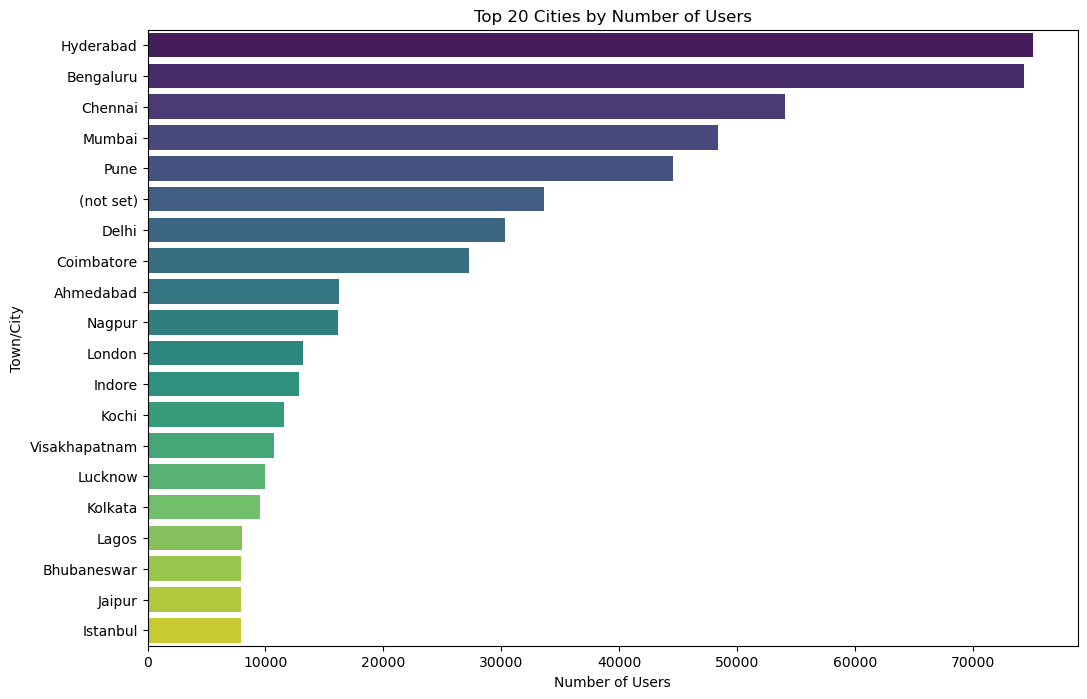

In [30]:
plt.figure(figsize=(12, 8))
sns.barplot(y=top_cities['Town/City'],x=top_cities['Users'],palette='viridis')
plt.xlabel('Number of Users')
plt.ylabel('Town/City')
plt.title('Top 20 Cities by Number of Users')
plt.show()

# Top Cities by Engagement Rate : 

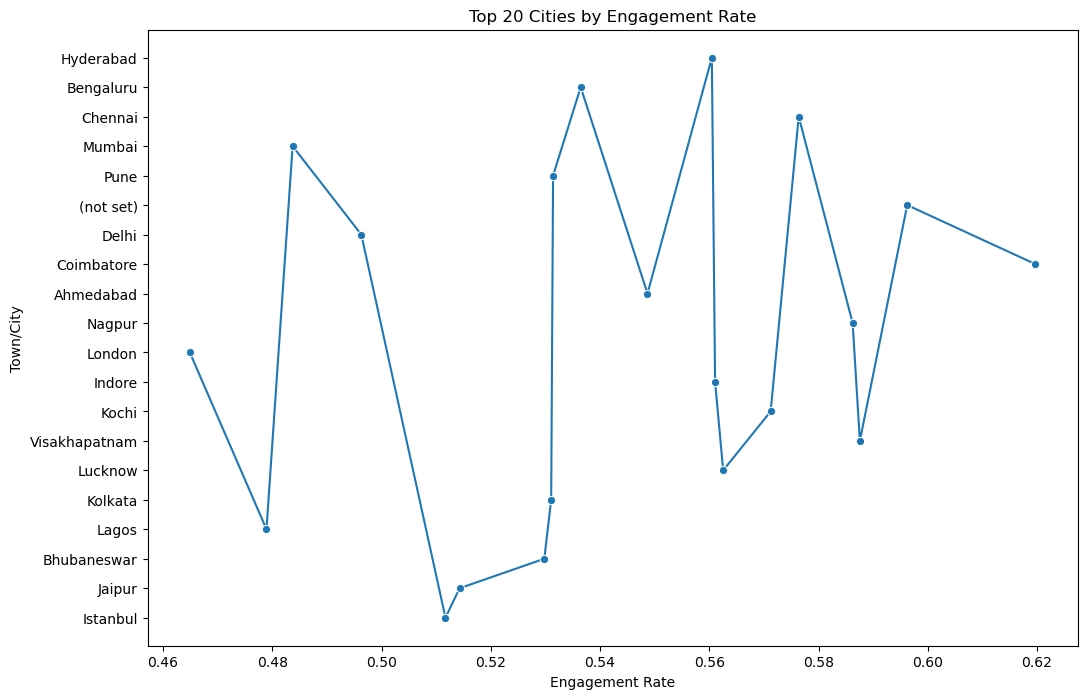

In [41]:
plt.figure(figsize=(12, 8))
sns.lineplot(data = top_cities,y=top_cities['Town/City'],x=top_cities['Engagement rate'],marker = 'o')
plt.xlabel('Engagement Rate')
plt.ylabel('Town/City')
plt.title('Top 20 Cities by Engagement Rate')
plt.show()

# Engagement Sessions per Users : 

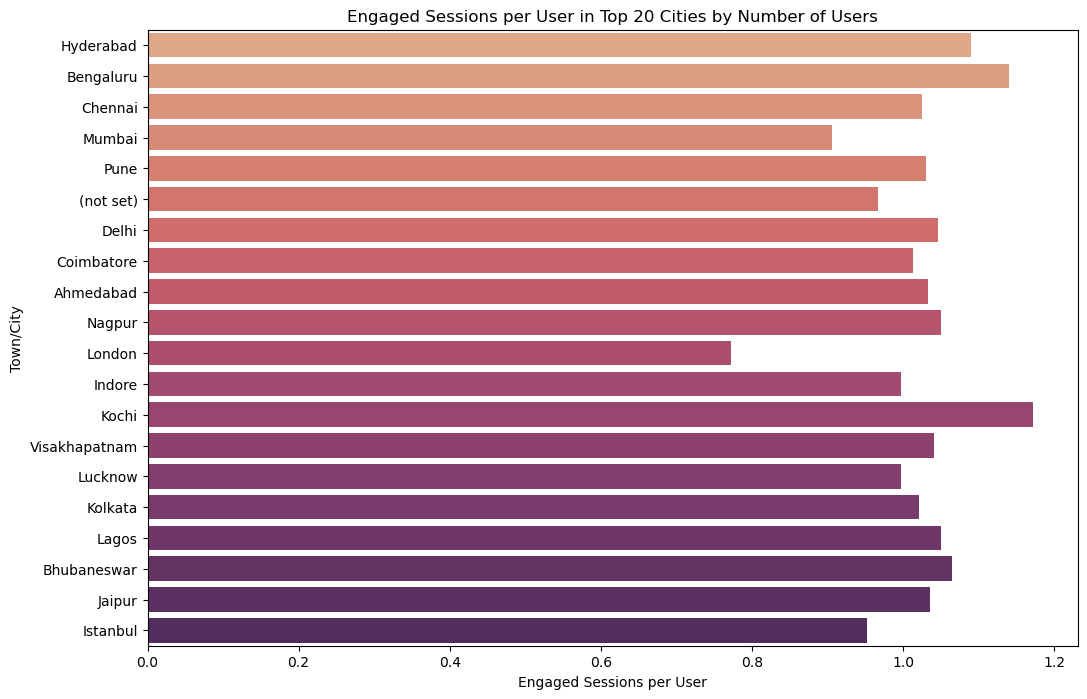

In [28]:
plt.figure(figsize=(12, 8))
sns.barplot(y=top_cities['Town/City'], x=top_cities['Engaged sessions per user'], palette='flare')
plt.xlabel('Engaged Sessions per User')
plt.ylabel('Town/City')
plt.title('Engaged Sessions per User in Top 20 Cities by Number of Users')
plt.show()

# Average Engagement Time by Users : 

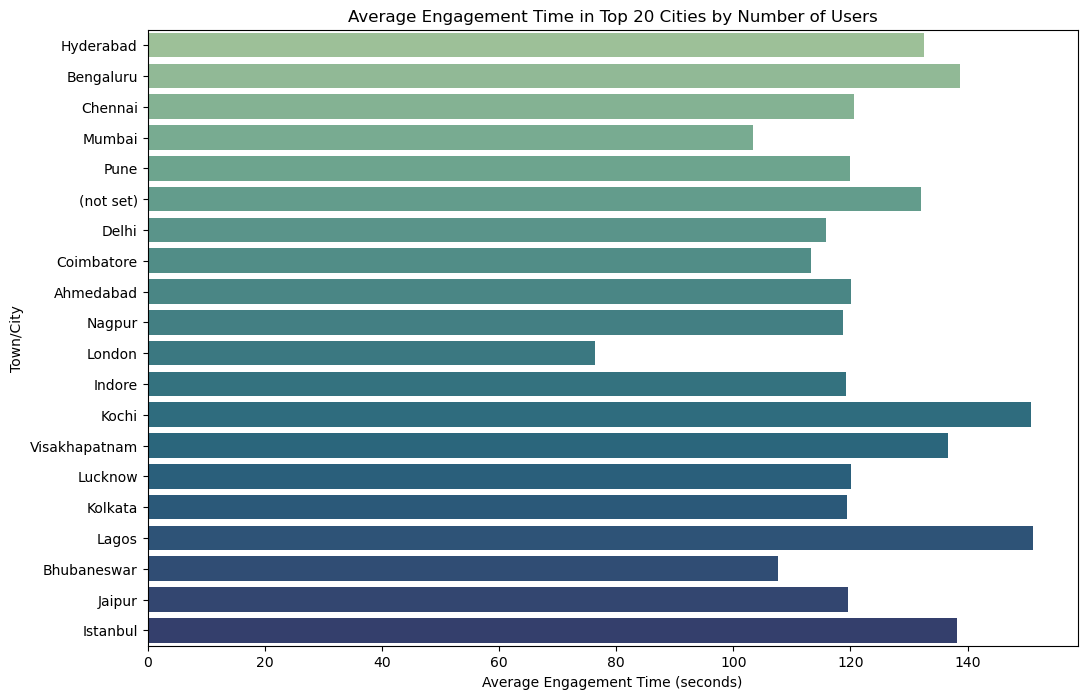

In [31]:
plt.figure(figsize=(12, 8))
sns.barplot(y=top_cities['Town/City'], x=top_cities['Average engagement time'], palette='crest')
plt.xlabel('Average Engagement Time (seconds)')
plt.ylabel('Town/City')
plt.title('Average Engagement Time in Top 20 Cities by Number of Users')
plt.show()

# New Users vs Returning Users : 

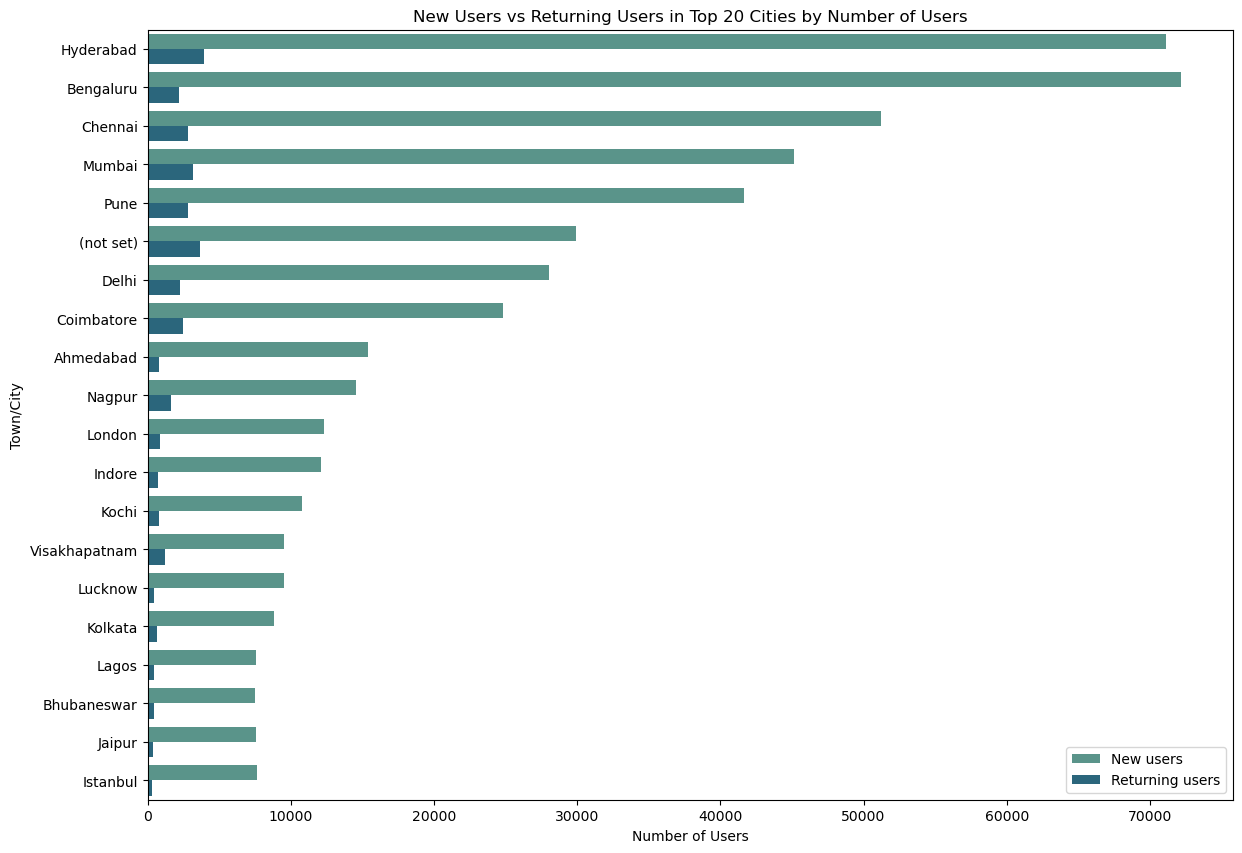

In [34]:
top_cities['Returning users'] = top_cities['Users'] - top_cities['New users']

top_cities_melted = top_cities.melt(id_vars='Town/City', value_vars=['New users', 'Returning users'],
                                    var_name='User Type', value_name='Count')

plt.figure(figsize=(14, 10))
sns.barplot(y='Town/City', x='Count', hue='User Type', data=top_cities_melted, palette='crest')
plt.xlabel('Number of Users')
plt.ylabel('Town/City')
plt.title('New Users vs Returning Users in Top 20 Cities by Number of Users')
plt.legend()
plt.show()

# Event Count : 

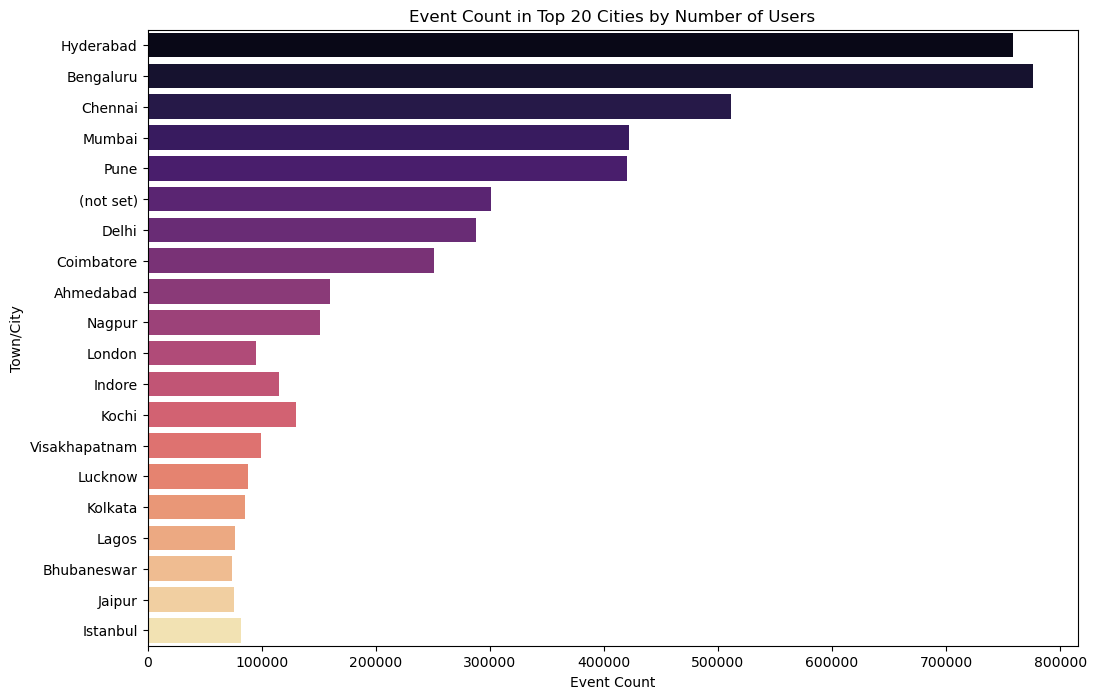

In [35]:
plt.figure(figsize=(12, 8))
sns.barplot(y=top_cities['Town/City'], x=top_cities['Event count'], palette='magma')
plt.xlabel('Event Count')
plt.ylabel('Town/City')
plt.title('Event Count in Top 20 Cities by Number of Users')
plt.show()

# User Segmentation by Cities for Budget Allocation :

##  High-Engagement Users :

In [36]:
high_engagement_users = data[(data['Engaged sessions per user'] > data['Engaged sessions per user'].mean())&(data['Average engagement time'] > data['Average engagement time'].mean())]

## New Users :

In [37]:
new_users = data[data['New users'] > (0.5 * data['Users'])]

## Returning Users : 

In [38]:
returning_users = data[data['Users'] - data['New users'] > (0.5 * data['Users'])]


## Categorize cities into high, medium, and low user count segment based on quantiles : 

In [39]:
user_quantiles = data['Users'].quantile([0.33, 0.67])
low_user_cities = data[data['Users'] <= user_quantiles[0.33]]
medium_user_cities = data[(data['Users'] > user_quantiles[0.33]) & (data['Users'] <= user_quantiles[0.67])]
high_user_cities = data[data['Users'] > user_quantiles[0.67]]

# Summary of Segments : 

In [40]:
segments_summary = {
    "High Engagement Users": len(high_engagement_users),
    "New Users": len(new_users),
    "Returning Users": len(returning_users),
    "Low User Cities": len(low_user_cities),
    "Medium User Cities": len(medium_user_cities),
    "High User Cities": len(high_user_cities)}

segments_summary

{'High Engagement Users': 1383,
 'New Users': 4975,
 'Returning Users': 17,
 'Low User Cities': 1687,
 'Medium User Cities': 1676,
 'High User Cities': 1637}

### So, demographics analysis involves examining the characteristics of a population based on factors such as age, gender, location, income, education, and more. It helps businesses and organizations understand their audience, tailor marketing strategies, personalize customer experiences, and make informed decisions.